# Cinnamon Quality Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d madaraweerasingha/cinnamon-quality-classification

Dataset URL: https://www.kaggle.com/datasets/madaraweerasingha/cinnamon-quality-classification
License(s): Attribution 4.0 International (CC BY 4.0)
  0%|                                               | 0.00/1.17k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.17k/1.17k [00:00<00:00, 3.38MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Cinnamon Quality Classification/cinnamon-quality-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Cinnamon Quality Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("balanced_cinnamon_quality_dataset.csv")

In [5]:
df.head()

,Sample_ID,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
0,H001,10.56,5.93,1.24,0.28,0.0019,0.0021,High
1,H002,11.43,5.60,1.35,0.25,0.0016,0.0039,High
2,H003,11.10,5.70,1.21,0.37,0.0013,0.0029,High
3,H004,10.90,5.76,1.47,0.27,0.0011,0.0035,High
4,H005,10.23,5.82,1.28,0.26,0.0013,0.0047,High


In [6]:
df.shape

(60, 8)

In [7]:
df.size

480

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample_ID               60 non-null     object 
 1   Moisture (%)            60 non-null     float64
 2   Ash (%)                 60 non-null     float64
 3   Volatile_Oil (%)        60 non-null     float64
 4   Acid_Insoluble_Ash (%)  60 non-null     float64
 5   Chromium (mg/kg)        60 non-null     float64
 6   Coumarin (mg/kg)        60 non-null     float64
 7   Quality_Label           60 non-null     object 
dtypes: float64(6), object(2)
memory usage: 3.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Moisture (%),60.0,11.883500,1.171428,10.0300,11.0475,11.63500,12.657500,13.9300
Ash (%),60.0,6.514500,0.637124,5.5300,5.9675,6.39500,7.160000,7.4900
Volatile_Oil (%),60.0,1.050833,0.272585,0.6100,0.7775,1.09000,1.260000,1.4900
Acid_Insoluble_Ash (%),60.0,0.450500,0.161816,0.2000,0.3475,0.43000,0.557500,0.7900
Chromium (mg/kg),60.0,0.002188,0.000739,0.0010,0.0016,0.00205,0.002625,0.0039
Coumarin (mg/kg),60.0,0.008837,0.004963,0.0021,0.0044,0.00845,0.012275,0.0194


In [10]:
df.isnull().sum()

Sample_ID                 0
Moisture (%)              0
Ash (%)                   0
Volatile_Oil (%)          0
Acid_Insoluble_Ash (%)    0
Chromium (mg/kg)          0
Coumarin (mg/kg)          0
Quality_Label             0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

Sample_ID                 60
Moisture (%)              55
Ash (%)                   48
Volatile_Oil (%)          46
Acid_Insoluble_Ash (%)    36
Chromium (mg/kg)          26
Coumarin (mg/kg)          53
Quality_Label              3
dtype: int64

In [13]:
df['Quality_Label'].value_counts()

Quality_Label
High      20
Medium    20
Low       20
Name: count, dtype: int64

## Data Visualization

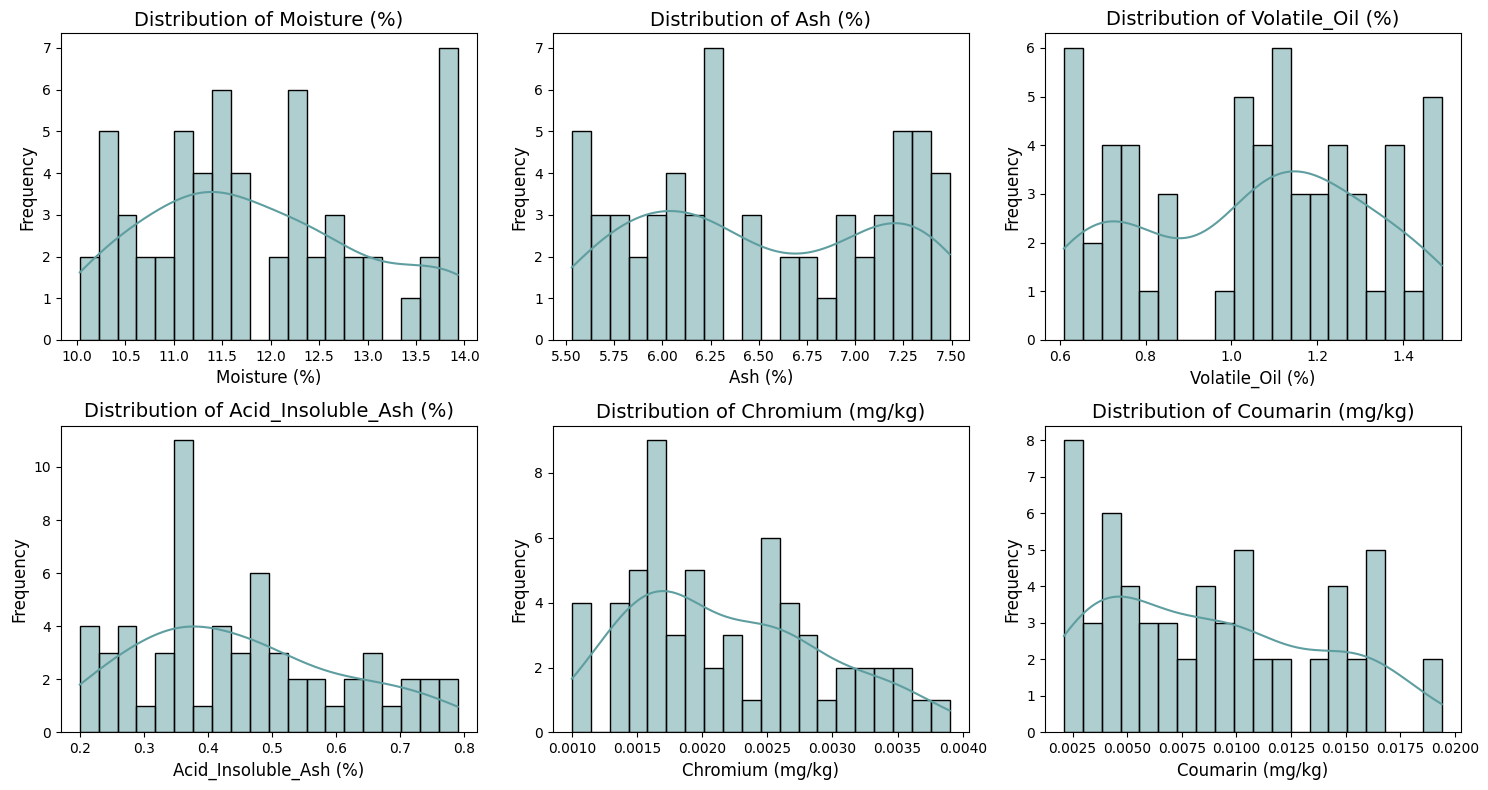

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

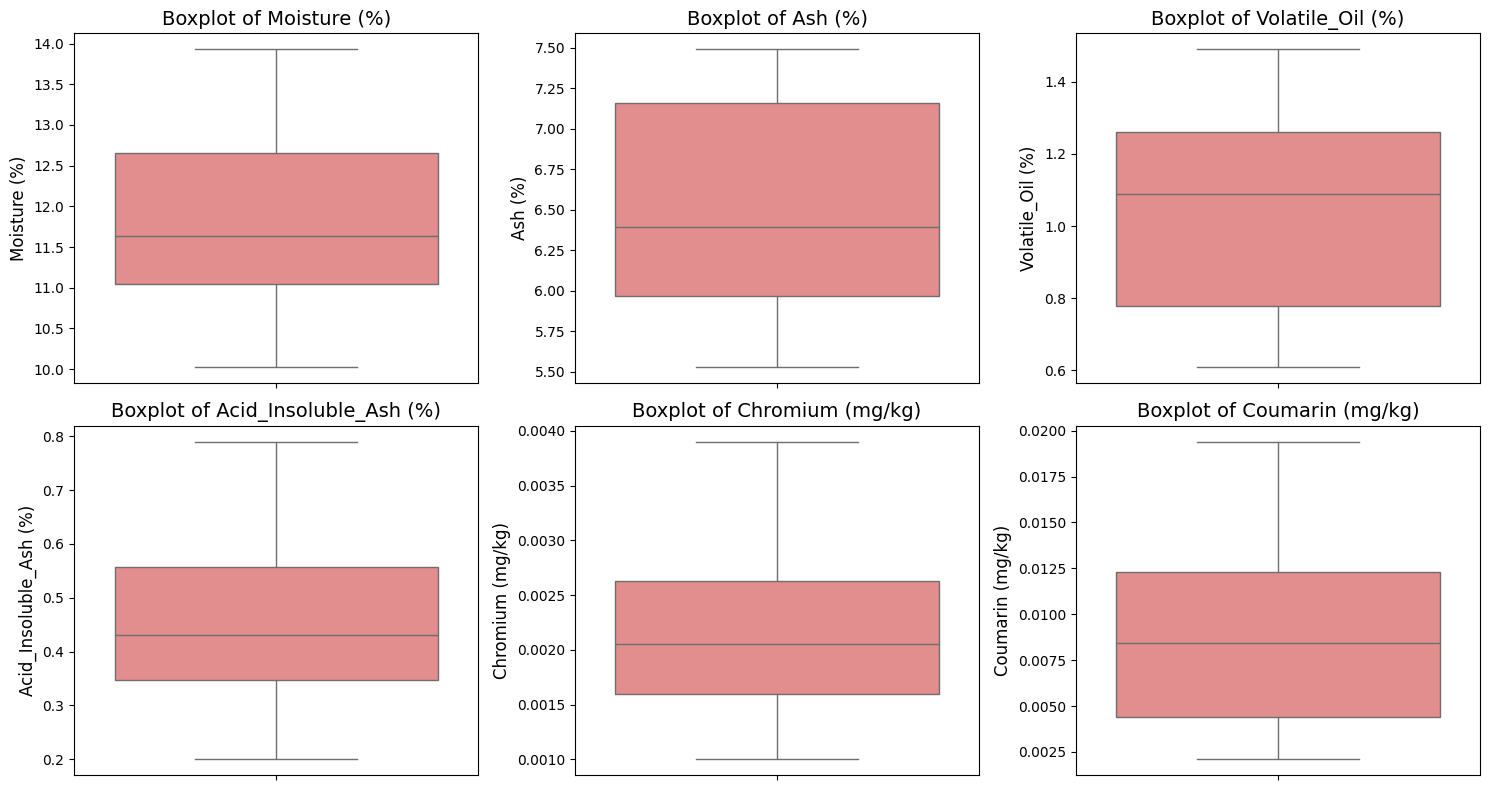

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

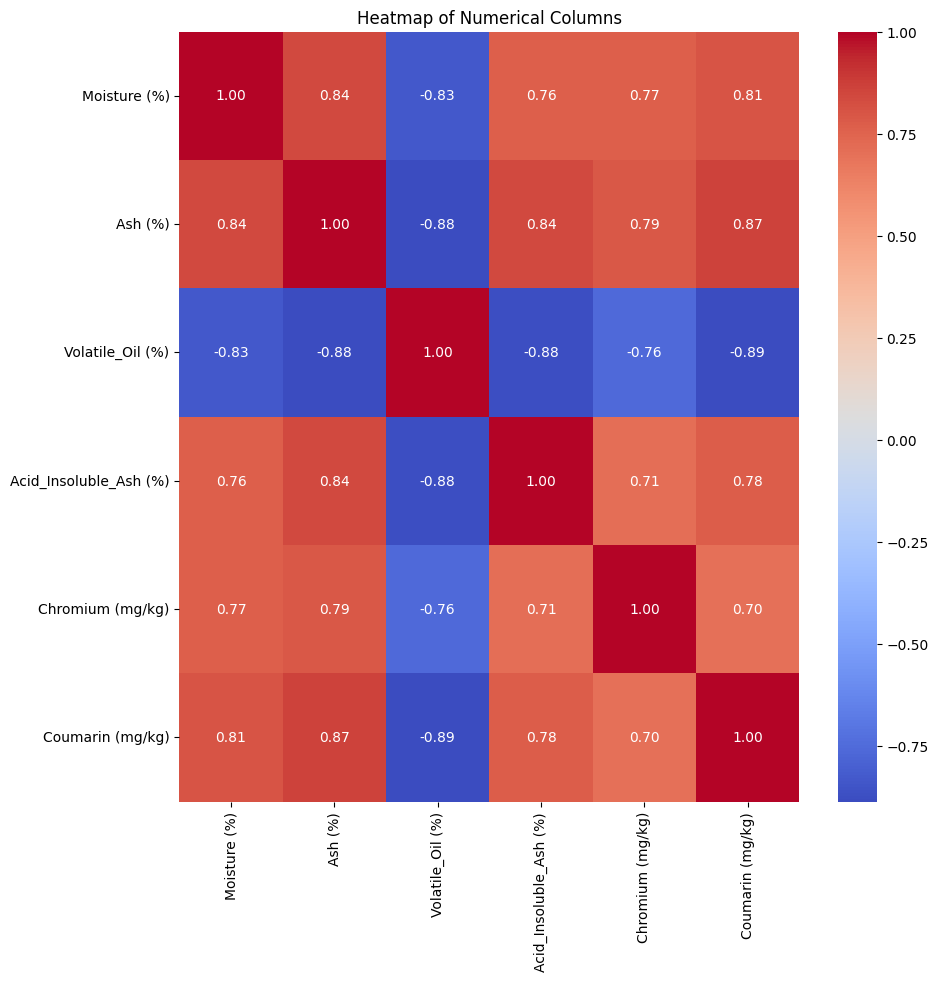

In [16]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [17]:
# Dropping unwanted column

df.drop(columns=['Sample_ID'], inplace=True)

In [18]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [19]:
X = df.drop(columns=['Quality_Label'])
y = df['Quality_Label']

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [22]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [24]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[1.0, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[4 0 0]
 [0 6 0]
 [0 0 2]]


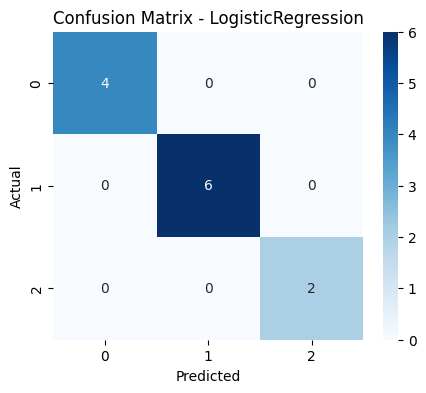

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         2

    accuracy                           0.83        12
   macro avg       0.56      0.67      0.60        12
weighted avg       0.72      0.83      0.77        12

Confusion Matrix:
 [[4 0 0]
 [0 6 0]
 [2 0 0]]


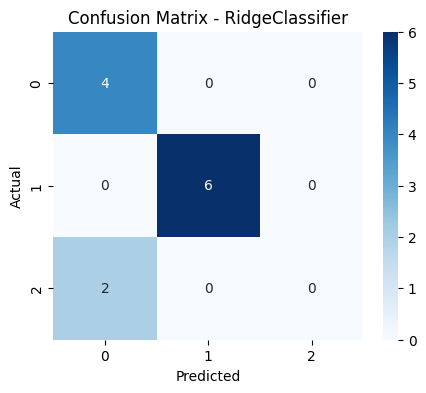

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[4 0 0]
 [0 6 0]
 [0 0 2]]


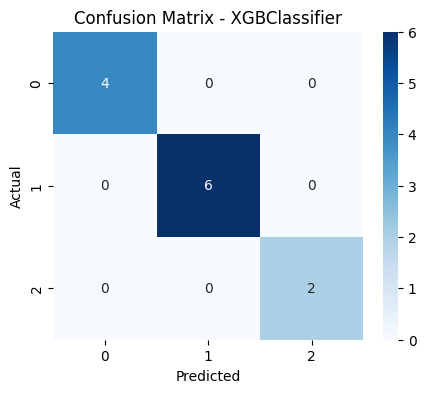

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[4 0 0]
 [0 6 0]
 [0 0 2]]


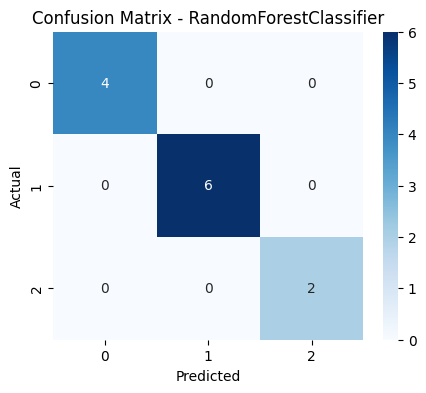

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[4 0 0]
 [0 6 0]
 [0 0 2]]


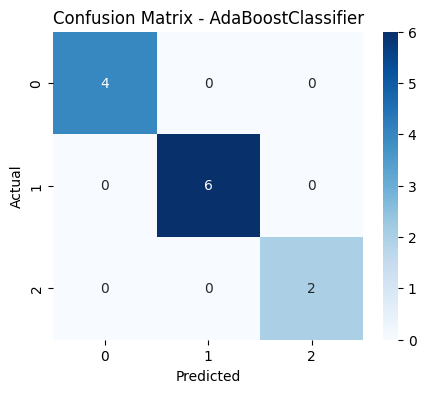

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[4 0 0]
 [0 6 0]
 [0 0 2]]


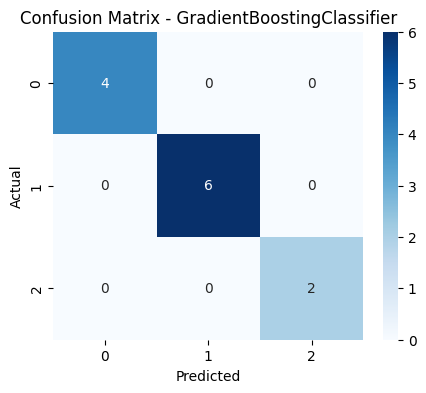

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[4 0 0]
 [0 6 0]
 [0 0 2]]


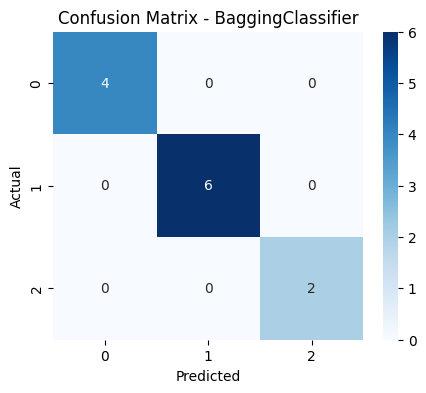

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[4 0 0]
 [0 6 0]
 [0 0 2]]


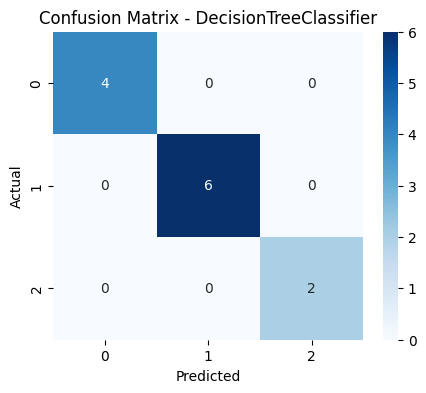

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[4 0 0]
 [0 6 0]
 [0 0 2]]


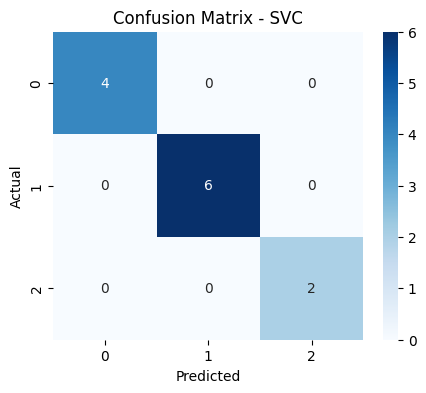

In [25]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()